Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)
    pass

def exercise_1(df):
    return df.columns.tolist()
    pass

def exercise_2(df, k):
    return df.head(k)
    pass

def exercise_3(df, k):
    return df.sample(n=k)
    pass

def exercise_4(df):
    return df['type'].unique()
    pass

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)
    pass

def exercise_6(df):
    return df[df['isFraud'] == 1]
    pass

def exercise_7(df):
    lista = df.groupby('nameOrig')['nameDest'].nunique()
    return lista.sort_values(ascending=False)
    pass

def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
        # Dados para o gráfico 1
        pass
    def transaction_counts_split_by_fraud(df):
        fraudes = df[df['isFraud'] == 1]
        return fraudes['type'].value_counts()
        # Dados para o gráfico 2
        pass

    fig, axs = plt.subplots(2, figsize=(8,12))
    transaction_counts(df0).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Contagem de tipos de transação')
    axs[0].set_xlabel('Gráfico 1')
    axs[0].set_ylabel('Nº de transações')
    transaction_counts_split_by_fraud(df0).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Contagem de fraudes por tipo de transação')
    axs[1].set_xlabel('Gráfico 2')
    axs[1].set_ylabel('Nº de transações')
    fig.suptitle('Análise Gráfica')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'Visualização:'
    pass


def visual_2(df):
    def query(df):
          cashOut = df[df['type'] == 'CASH_OUT']
          colunasContas = ['oldbalanceOrg', 'newbalanceDest']
          return cashOut[colunasContas]
          pass

    plot = query(df0).plot.scatter(x='oldbalanceOrg',y='newbalanceDest')
    plot.set_title('Variação entre saldo de contas de origem e contas de destino')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'Visualização:'
    pass

def exercise_custom(df):
    # Lista das contas com maior valor acumulado no tipo PAYMENT de transação:
    payment = df[df['type'] == 'PAYMENT']
    contas = payment.groupby('nameOrig')['amount'].sum().reset_index()
    return contas.sort_values(by='amount', ascending=False)
    pass

def visual_custom(df):
    #Quantidade acumulada de transações por Tipo:
    tipos = df.groupby('type')['amount'].sum()
    tipos.plot(kind='bar', figsize=(10, 6))
    plt.title('Quantidade acumulada de Transações por Tipo')
    plt.xlabel('Tipo de Transação')
    plt.ylabel('Quantia')
    pass

In [ ]:
df0 = exercise_0('/content/sample_data/transactions.csv')
print(df0)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1         1   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2         1  TRANSFER     181.00  C1305486145          181.0            0.00   
3         1  CASH_OUT     181.00   C840083671          181.0            0.00   
4         1   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...     ...       ...        ...          ...            ...             ...   
83556    10   PAYMENT    7705.70  C1834114901        96490.0        88784.30   
83557    10  CASH_OUT  319045.01  C1964329082        56471.0            0.00   
83558    10   CASH_IN  249169.96  C1421944154         3481.0       252650.96   
83559    10  CASH_OUT  244279.64   C722886752        29968.0            0.00   
83560    10  CASH_OUT  145014.63    C60491101            NaN             NaN   

          nameDest  oldbalanceDest  new

In [ ]:
df1 = exercise_1(df0)
print(df1)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
df2 = exercise_2(df0,5)
print(df2)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
df3 = exercise_3(df0,4) #Escolhi um número qualquer (4)
print(df3)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
72891    10   PAYMENT   16969.48  C1764685666     1145635.86      1128666.38   
5319      5  CASH_OUT  180009.70   C685605293           0.00            0.00   
15061     8   PAYMENT    5752.16   C981765046       50541.00        44788.84   
92433    10   PAYMENT   16229.18  C1048173143      192488.83       176259.65   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
72891   M671219386            0.00            0.00      0.0             0.0  
5319   C1922859107       429475.91       609485.61      0.0             0.0  
15061  M1883890038            0.00            0.00      0.0             0.0  
92433    M21320863            0.00            0.00      0.0             0.0  


In [ ]:
df4 = exercise_4(df0)
print(df4)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [ ]:
df5 = exercise_5(df0)
print(df5)

nameDest
C985934102     80
C1286084959    77
C248609774     73
C1590550415    72
C2083562754    69
C977993101     67
C665576141     67
C1360767589    63
C451111351     62
C97730845      61
Name: count, dtype: int64


In [ ]:
df6 = exercise_6(df0)
print(df6)

        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
102181    10  CASH_OUT  2662734.59   C813115168     2662734.59   
102607    10  TRANSFER     9217.19   C184586799        9217.19   
102608    10  CASH_OUT     9217.19  C1105700111        9217.19   
136419    11  TRANSFER     2100.00   C785601242        2100.00   
136420    11  CASH_OUT     2100.00   C169099320        2100.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00      1.0   
3                  0.0    C38997010        2118

In [ ]:
df7 = exercise_7(df0)
print(df7)

nameOrig
C1709295811    2
C1000028246    1
C359592198     1
C359546318     1
C35954748      1
              ..
C1646409528    1
C1646384718    1
C1646374632    1
C1646325622    1
C999983894     1
Name: nameDest, Length: 138115, dtype: int64


Create graphs for the following.
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes

The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'Visualização:'

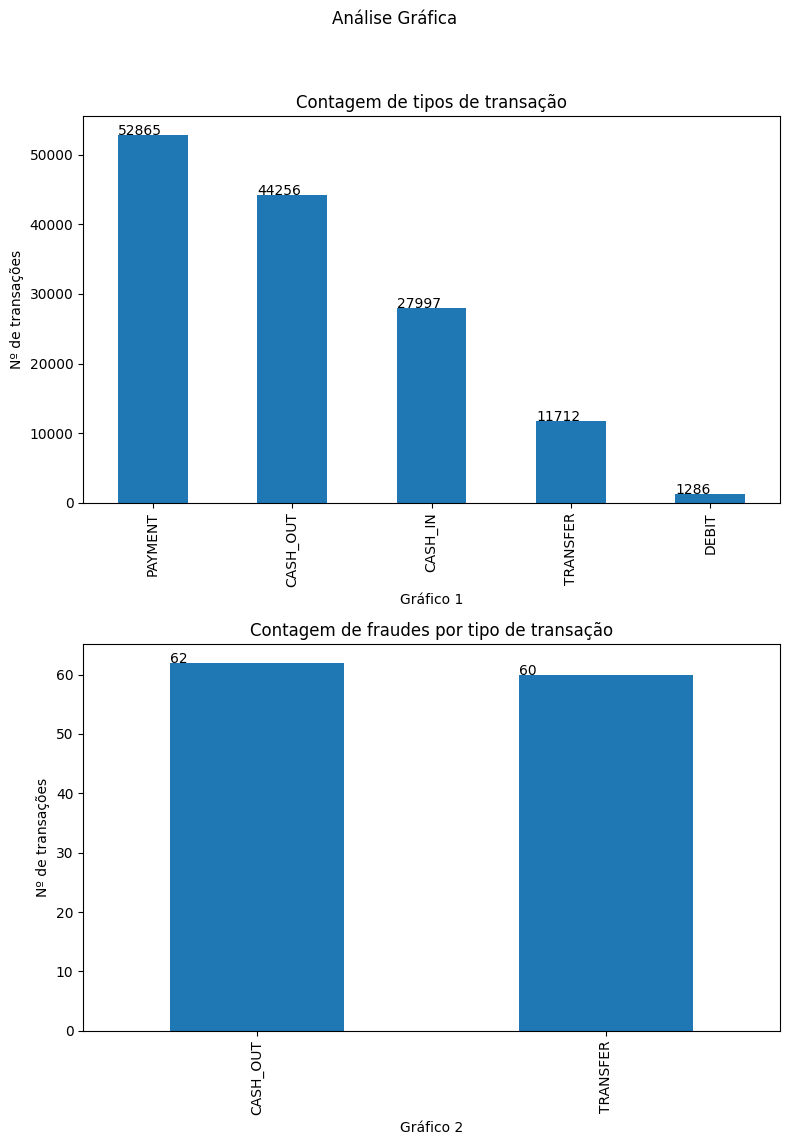

In [ ]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
        # Dados para o gráfico 1
        pass
    def transaction_counts_split_by_fraud(df):
        fraudes = df[df['isFraud'] == 1]
        return fraudes['type'].value_counts()
        # Dados para o gráfico 2
        pass

    fig, axs = plt.subplots(2, figsize=(8,12))
    transaction_counts(df0).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Contagem de tipos de transação')
    axs[0].set_xlabel('Gráfico 1')
    axs[0].set_ylabel('Nº de transações')
    transaction_counts_split_by_fraud(df0).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Contagem de fraudes por tipo de transação')
    axs[1].set_xlabel('Gráfico 2')
    axs[1].set_ylabel('Nº de transações')
    fig.suptitle('Análise Gráfica')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'Visualização:'

visual_1(df0)


'Visualização:'

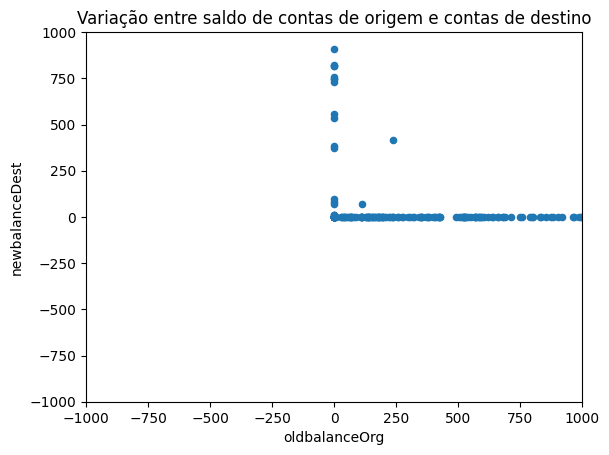

In [ ]:
def visual_2(df):
    def query(df):
        cashOut = df[df['type'] == 'CASH_OUT']
        colunasContas = ['oldbalanceOrg', 'newbalanceDest']
        return cashOut[colunasContas]
        pass


    plot = query(df0).plot.scatter(x='oldbalanceOrg',y='newbalanceDest')
    plot.set_title('Variação entre saldo de contas de origem e contas de destino')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'Visualização:'

visual_2(df0)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [ ]:
def exercise_custom(df):
    # Lista das contas com maior valor acumulado no tipo PAYMENT de transação:
    payment = df[df['type'] == 'PAYMENT']
    contas = payment.groupby('nameOrig')['amount'].sum().reset_index()
    return contas.sort_values(by='amount', ascending=False)
    pass

def visual_custom(df):
    #Quantidade acumulada de transações por Tipo:
    tipos = df.groupby('type')['amount'].sum()
    tipos.plot(kind='bar', figsize=(10, 6))
    plt.title('Quantidade acumulada de Transações por Tipo')
    plt.xlabel('Tipo de Transação')
    plt.ylabel('Quantia')
    pass

In [ ]:
customizado = exercise_custom(df0)
print(customizado)

          nameOrig    amount
4543   C1166083556  83428.95
25522  C1936003364  75822.50
30304  C2109205563  75471.14
30084  C2101212167  72879.47
7413   C1270890232  71491.05
...            ...       ...
743    C1027858974      2.11
19322  C1710023146      1.77
10098  C1372921904      0.89
44869   C712656982      0.63
35097   C351586034      0.32

[52865 rows x 2 columns]


None


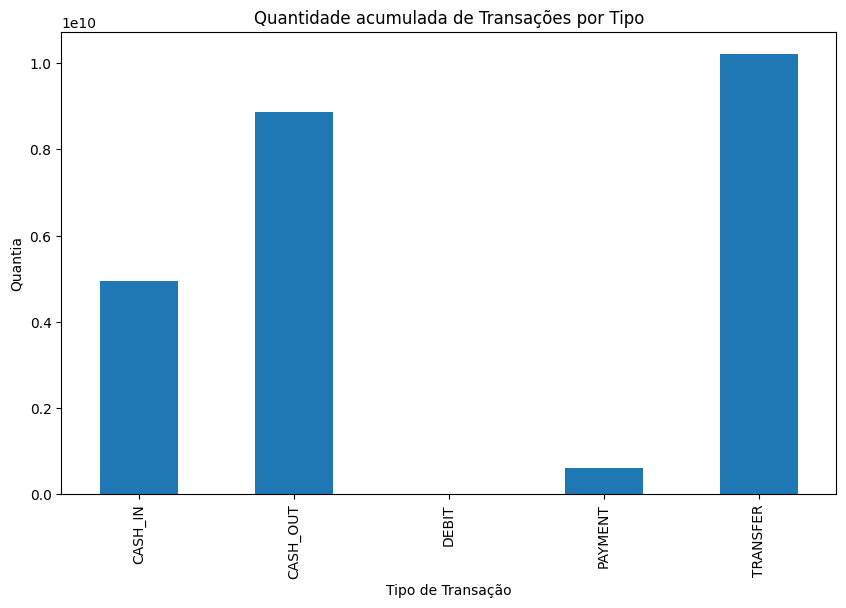

In [ ]:
graficoCustom = visual_custom(df0)
print(graficoCustom)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.